In [149]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [150]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [151]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train = set_train[set_train['count_floors_pre_eq'] <= 6]
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [152]:
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage']
train_values_subset = set_train[columnas_seleccionadas]
train_labels = set_train.iloc[:,-1]

In [153]:
train_values_subset = pd.get_dummies(train_values_subset)

In [154]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=5, max_features=4,max_depth=47)

In [155]:
rf_model.fit(train_values_subset, train_labels.values.ravel())

RandomForestClassifier(max_depth=47, max_features=4, n_estimators=5,
                       random_state=1)

In [156]:
preds = rf_model.predict(train_values_subset)
f1_score(train_labels, preds, average='micro')

0.8595102855388395

In [157]:
test_values = pd.read_csv('test_values.csv',index_col='building_id')

In [158]:
test_values_subset = test_values[columnas_seleccionadas]
test_values_subset = pd.get_dummies(test_values_subset)

In [159]:
predictions = rf_model.predict(test_values_subset)

In [160]:
submission_format = pd.read_csv('submission_format.csv',index_col='building_id')

In [161]:
my_submission = pd.DataFrame(data=predictions, columns=submission_format.columns,
                            index=submission_format.index)

In [162]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,3
890251,2
745817,1
421793,2


In [163]:
my_submission.to_csv('submision.csv')

In [164]:
!head submision.csv

building_id,damage_grade
300051,3
99355,3
890251,2
745817,1
421793,2
871976,2
691228,1
896100,3
343471,2


In [165]:
# Gini importance
rf_model.feature_importances_

array([0.1791176 , 0.18881111, 0.20731619, 0.03837898, 0.27067961,
       0.11569651])

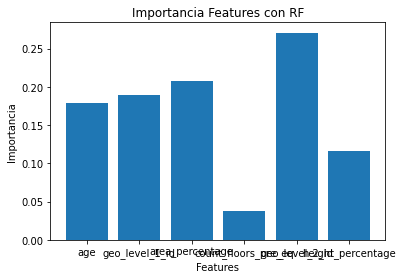

In [166]:
plt.bar(test_values_subset.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()